#  Making OG vs. Telemetery CSV

This file takes the comparison and telemetry csv and displays plotto explain the OG terms wrt telemetry.

Read from the 

In [15]:
import sparkles.spark as Spark
import sparkles.file_reader as fr
import pandas as pd
import sim.err_budget as eb
from importlib import reload

# gdi I will figure out these stupid color bars

import matplotlib
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [16]:
# list of how many modes in the gain block
mode_counts = np.array([1,1, 1, 14, 29, 60, 87, 105, 113, 125, 145, 166, 166, 194, 357])
mode_cumulative = np.cumsum(mode_counts)
mode_cumulative

array([   1,    2,    3,   17,   46,  106,  193,  298,  411,  536,  681,
        847, 1013, 1207, 1564])

## Combining duckDB CSV files

In [17]:
selfRM_compare = pd.read_csv('/home/eden/code/sparkles/telem/csv/selfRM_mags_comp_clean.csv')
selfRM_telem = pd.read_csv('/home/eden/code/sparkles/telem/csv/selfRM_telem_total_betterDIMM.csv')

In [18]:
# create a name for all files
selfRM_compare['UT'] = pd.to_datetime(selfRM_compare['UT'])
# julian time, MJD
selfRM_compare['jul'] = pd.DatetimeIndex(selfRM_compare['UT']).to_julian_date() - 2400000.5 
selfRM_compare['jul'] = selfRM_compare['jul'].round(3)
# target
selfRM_compare['name'] = selfRM_compare['target'].astype(str) + ' J' + selfRM_compare['jul'].astype(str)
# Julien date

In [19]:
selfRM_telem

,column0,selfRM,type,UT,MOD,TRIG,HZ,SEPS,ANGS,AMPS,...,multcoef,ts:5,gains,mcs,camwfs_time_ts,camwfs_time_ts:1,tcsi_telsee_ts,tcsi_telpos_ts,holoop_ts,hogain_ts
0,32,selfRM_20221211_12_TYC4865-1113-1_001.fits,SKY,2022-12-11 02:21:36,True,True,NaN,20.0,0.0,0.015,...,0.98,2022-12-11 02:21:31.941119,"[0.75, 0.75, 0.6, 0.45, 0.3, 0.25, 0.25, 0.25,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-12-11 02:21:34.597551,2022-12-11 02:21:34.082838,2022-12-10 06:32:12.094626,2022-12-10 06:32:13.095502,2022-12-11 02:21:26.897864,2022-12-11 02:21:31.941119
1,34,selfRM_20221211_12_TYC4865-1113-1_002.fits,SKY,2022-12-11 02:24:26,True,True,NaN,20.0,0.0,0.015,...,0.98,2022-12-11 02:24:20.392554,"[0.75, 0.75, 0.6, 0.45, 0.3, 0.25, 0.25, 0.25,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-12-11 02:24:23.571544,2022-12-11 02:24:25.578873,2022-12-10 06:32:12.094626,2022-12-10 06:32:13.095502,2022-12-11 02:24:16.929994,2022-12-11 02:24:20.392554
2,33,selfRM_20221011_12_HD15115_001.fits,SKY,2022-12-12 01:49:06,False,False,NaN,NaN,NaN,NaN,...,0.98,2022-12-12 01:48:56.969526,"[0.75, 0.75, 0.7, 0.5, 0.5, 0.35, 0.25, 0.25, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-12-12 01:49:01.881535,2022-12-12 01:49:03.888806,2022-12-10 06:32:12.094626,2022-12-10 06:32:13.095502,2022-12-12 01:49:05.730391,2022-12-12 01:48:56.969526
3,65,selfRM_sparkles_20221211_12_001.fits,LAB,2022-12-12 05:42:42,True,False,1800.0,20.0,62.0,0.020,...,0.98,2022-12-12 05:42:34.619474,"[0.65, 0.65, 0.45, 0.35, 0.25, 0.2, 0.2, 0.2, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-12-12 05:42:40.812542,2022-12-12 05:42:40.297834,2022-12-10 06:32:12.094626,2022-12-10 06:32:13.095502,2022-12-12 05:42:39.060854,2022-12-12 05:42:34.619474
4,73,selfRM_20221211_12_LAB_001.fits,LAB,2022-12-12 05:42:42,True,False,1800.0,20.0,62.0,0.020,...,0.98,2022-12-12 05:42:34.619474,"[0.65, 0.65, 0.45, 0.35, 0.25, 0.2, 0.2, 0.2, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2022-12-12 05:42:40.812542,2022-12-12 05:42:40.297834,2022-12-10 06:32:12.094626,2022-12-10 06:32:13.095502,2022-12-12 05:42:39.060854,2022-12-12 05:42:34.619474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,27,selfRM_20230317_0457_HD95086.fits,SKY,2023-03-17 04:59:46,True,True,NaN,20.0,0.0,0.020,...,0.98,2023-03-17 04:59:40.002975,"[0.5, 0.5, 0.35, 0.25, 0.2, 0.2, 0.15, 0.15, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.98, 0....",2023-03-17 04:59:44.061607,2023-03-17 04:59:43.546905,2023-03-17 04:59:40.756729,2023-03-17 04:59:45.938371,2023-03-17 04:59:45.384772,2023-03-17 04:59:40.002975
74,28,selfRM_20230317_0723_HD95086.fits,SKY,2023-03-17 07:23:46,True,True,NaN,20.0,0.0,0.020,...,0.98,2023-03-17 07:23:45.443951,"[0.6, 0.65, 0.35, 0.3, 0.3, 0.25, 0.25, 0.25, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.98, 0....",2023-03-17 07:23:44.598604,2023-03-17 07:23:44.083903,2023-03-17 07:23:41.51859,2023-03-17 07:23:45.680403,2023-03-17 07:23:45.993223,2023-03-17 07:23:45.443951
75,31,selfRM_20230317_IMLup.fits,SKY,2023-03-17 09:57:42,True,True,NaN,20.0,0.0,0.020,...,0.98,2023-03-17 09:57:33.101407,"[0.65, 0.65, 0.35, 0.3, 0.3, 0.25, 0.25, 0.25,...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.98, 0....",2023-03-17 09:57:40.747607,2023-03-17 09:57:40.232876,2023-03-17 09:57:32.013042,2023-03-17 09:57:41.487366,2023-03-17 09:57:36.634457,2023-03-17 09:57:33.101407
76,63,selfRM_20230522_LAB_spark_1799_020amps_20seps....,LAB,2023-03-17 10:44:42,False,False,NaN,NaN,NaN,NaN,...,0.98,2023-03-17 10:44:34.768566,"[0.65, 0.65, 0.35, 0.3, 0.3, 0.25, 0.25, 0.25,...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.98, 0....",2023-03-17 10:08:22.235607,2023-03-17 10:08:24.242921,2023-03-17 10:05:22.344792,2023-03-17 10:44:15.574345,2023-03-17 10:44:32.054654,2023-03-17 10:44:34.768566


### SelfRM Compare - create a OG column

iter to calculate OG


In [20]:
# create a basic OG table
# for each row, calc optical gain
RM_dir = '/home/eden/data/selfRMs_all/'

import matplotlib.pylab as pl

OGains = []
OGains_mean = []
OGains_std = []
OGains_mean_std = []

for idx, row in selfRM_compare.iterrows():
    # pull the fits files from the right place
    if(row['type'] == 'SKY'):
        data_sky = fits.open(RM_dir + 'SKY/' + row['selfRM'])[0].data
        data_lab = fits.open(RM_dir +'LAB/' + row['l_selfRM'])[0].data
        diag_sky = np.diag(data_sky[5])
        diag_lab = np.diag(data_lab[5])
        OG_series = diag_sky/diag_lab
        OG = np.median(OG_series[106:1208])
        OG_std = np.std(OG_series[106:1208]) / np.sqrt(1208-106)
        OG_m = np.mean(diag_sky/diag_lab)
        OG_m_std = np.std(diag_sky/diag_lab)/ np.sqrt(1564)
    else: 
        print("rough")
        OG=-1
        OG_m=-1
        OG_std=0
        OG_m_std=0
    OGains.append(OG)
    OGains_mean.append(OG_m)
    OGains_std.append(OG_std)
    OGains_mean_std.append(OG_m_std)
        
selfRM_compare['OG'] = OGains
selfRM_compare['OG_mean'] = OGains_mean
selfRM_compare['OG_std'] = OGains_std
selfRM_compare['OG_std_mean'] = OGains_mean_std
selfRM_compare.sort_values(by=['selfRM'], inplace=True)
    

rough


### Merge SelfRM_telem

In [21]:
# picking only the sky selfRMs
df_telem = selfRM_telem.loc[selfRM_telem['type'] == 'SKY']
df_comp_clean = selfRM_compare.loc[selfRM_compare['type'] == 'SKY']
# mergee OG list with telemetry
df_telem_OG = pd.merge(df_telem, df_comp_clean,  on= ['selfRM'])
df_telem_OG.sort_values(by=['selfRM'], inplace=True)
# create a modified DIMM column for elevation
df_telem_OG['dimm_mod'] = eb.el_scaling_DIMM(df_telem_OG['el'], df_telem_OG['dimm_fwhm'])
# create a modified DIMM column for elevation
df_telem_OG['dimm_mod'] = eb.el_scaling_DIMM(df_telem_OG['el'], df_telem_OG['dimm_fwhm'])

In [22]:
# check times on dimm
print(f"Number of measurements: {len(df_telem_OG['name'].unique())}")
print(f"Number of measurements: {len(df_telem_OG['target'].unique())}")
df_telem_OG.columns

Number of measurements: 32
Number of measurements: 13


Index(['column0_x', 'selfRM', 'type_x', 'UT_x', 'MOD_x', 'TRIG_x', 'HZ_x',
       'SEPS_x', 'ANGS_x', 'AMPS_x', 'ts_x', 'fps_x', 'emGain_x', 'exptime_x',
       'ts:1', 'atime', 'wtime', 'wmatime', 'ts:2', 'dimm_fwhm', 'ts:3', 'ra',
       'dc', 'el', 'ha', 'rotoff', 'ts:4', 'state', 'loopgain', 'multcoef',
       'ts:5', 'gains', 'mcs', 'camwfs_time_ts', 'camwfs_time_ts:1',
       'tcsi_telsee_ts', 'tcsi_telpos_ts', 'holoop_ts', 'hogain_ts',
       'column0_y', 'type_y', 'UT_y', 'MOD_y', 'TRIG_y', 'HZ_y', 'SEPS_y',
       'ANGS_y', 'AMPS_y', 'ts_y', 'fps_y', 'emGain_y', 'exptime_y',
       'l_selfRM', 'l_fps', 'l_SEPS', 'l_ANGS', 'l_AMPS', 'l_MOD', 'Target',
       'target', 'spec_type', 'Gia_G', 'G-V', 'V-Ic', 'I_c', 'I_c_wave',
       'mag_V', 'wav_V', 'mag_I', 'wav_I', 'jul', 'name', 'OG', 'OG_mean',
       'OG_std', 'OG_std_mean', 'dimm_mod'],
      dtype='object')

### Adding mode count

In [23]:
modes_list = []
for idx, row in df_telem_OG.iterrows():
    # ok so take the column with the mode gains
    gains = np.array([float(x) for x in row['gains'].replace("[", '').replace(']', '').split(',')])
    # make a TRUE FALSE column of 1's and 0's if above or below 
    compare = np.where(gains > 0, 1, 0)
    # multiply with the mode_counts, then sum
    n_modes = np.sum(compare*mode_counts)
    modes_list.append(n_modes) 
df_telem_OG["n_modes"] = modes_list

### Saving to a CSV

In [ ]:
# save a tidy version to a CSV
df_clean = df_telem_OG[['UT_x', 'jul', 'name', 'target', 'I_c', 'dimm_fwhm', 'el','dimm_mod', 'fps_x', 'loopgain', 'gains', 'n_modes', 'selfRM', 'l_selfRM', 'OG', 'OG_std',]].copy(deep=True)
df_clean.rename(columns={"UT_x": "UT", "jul": "MJD", "fps_x":'fps', "l_selfRM":'selfRM_LAB', 'selfRM':'selfRM_SKY', 'I_c':'mag_I_c', 'OG_std': 'OG_StandErr'}, inplace=True)
df_clean.to_csv('OG_with_telem.csv')

In [26]:
# PAPEAR TABLE: - even fewwer bits and bobs

# save a tidy version to a CSV
df_paper = df_telem_OG[['jul', 'target', 'I_c', 'fps_x', 'n_modes', 'dimm_mod',  'OG', 'OG_std',]].copy(deep=True)
df_paper.rename(columns={ "jul": "MJD", "fps_x":'fps', 'I_c':'mag_I_c', 'OG_std': 'OG_StandErr'}, inplace=True)
df_paper['mag_I_c'] = np.round(df_paper['mag_I_c'] , 2)
df_paper['dimm_mod'] = np.round(df_paper['dimm_mod'] , 2)
df_paper['OG_StandErr'] = np.round(df_paper['OG_StandErr'] , 4)
df_paper['OG'] = np.round(df_paper['OG'] , 4)
df_paper.to_csv('df_paper.csv')

## Plotting OG_telem

DO NOT USE THESE PLOTS FOR YOUR PAPER. 

All paper plots are now in OG_telem_PLOTS.ipynb 

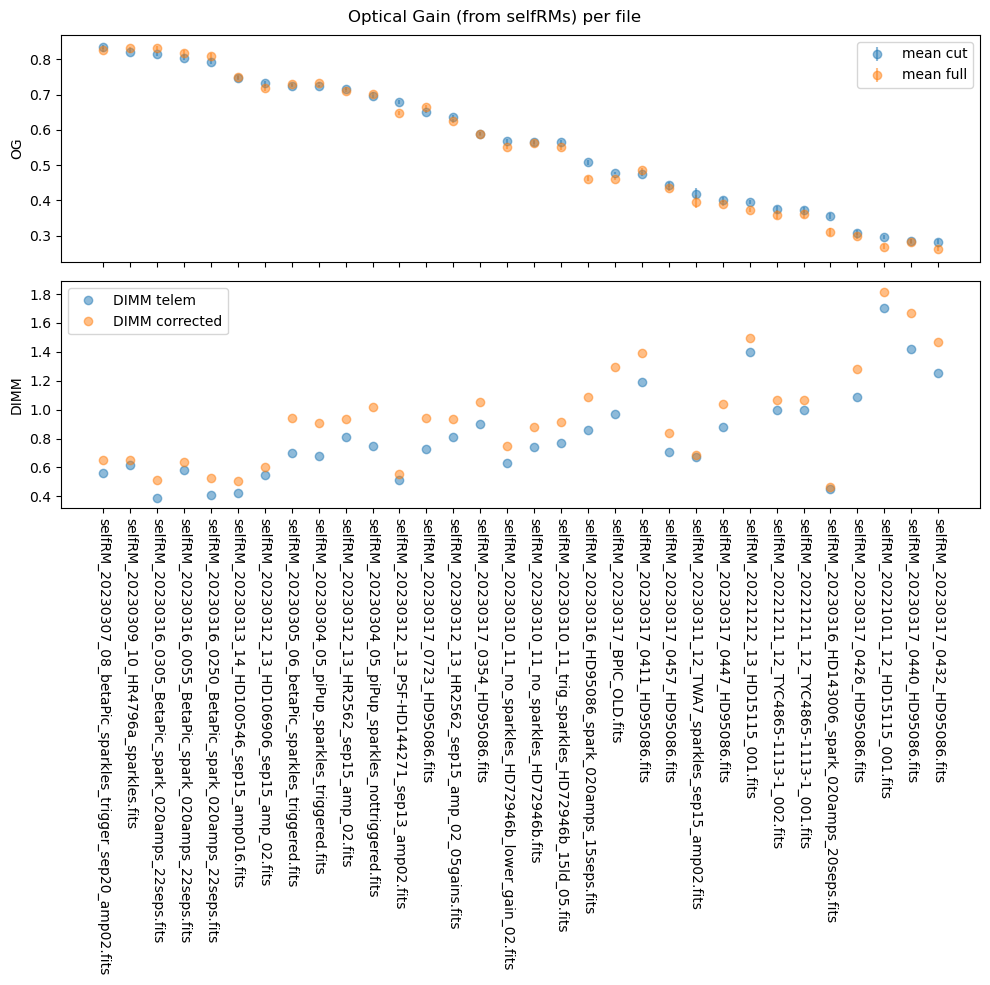

In [13]:
# What files are we able to use?

# SORT: 
df_telem_OG.sort_values(by=['OG'], inplace=True, ascending=False)

## PLOT: OG vs. name 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10), facecolor='white', sharex=True)

axs[0].errorbar(df_telem_OG['selfRM'], df_telem_OG['OG'], yerr = 2*df_telem_OG['OG_std'], alpha=0.5, fmt='o', label='mean cut')
axs[0].errorbar(df_telem_OG['selfRM'], df_telem_OG['OG_mean'], yerr = 2*df_telem_OG['OG_std_mean'], alpha=0.5, fmt='o', label='mean full')
axs[0].set_ylabel('OG')
axs[0].legend()

axs[1].errorbar(df_telem_OG['selfRM'], df_telem_OG['dimm_fwhm'],  alpha=0.5, fmt='o', label='DIMM telem')
axs[1].errorbar(df_telem_OG['selfRM'], df_telem_OG['dimm_mod'],  alpha=0.5, fmt='o', label='DIMM corrected')
axs[1].set_ylabel('DIMM')
axs[1].legend()

plt.xticks(rotation=-90)
plt.suptitle('Optical Gain (from selfRMs) per file')
plt.tight_layout()
plt.show()

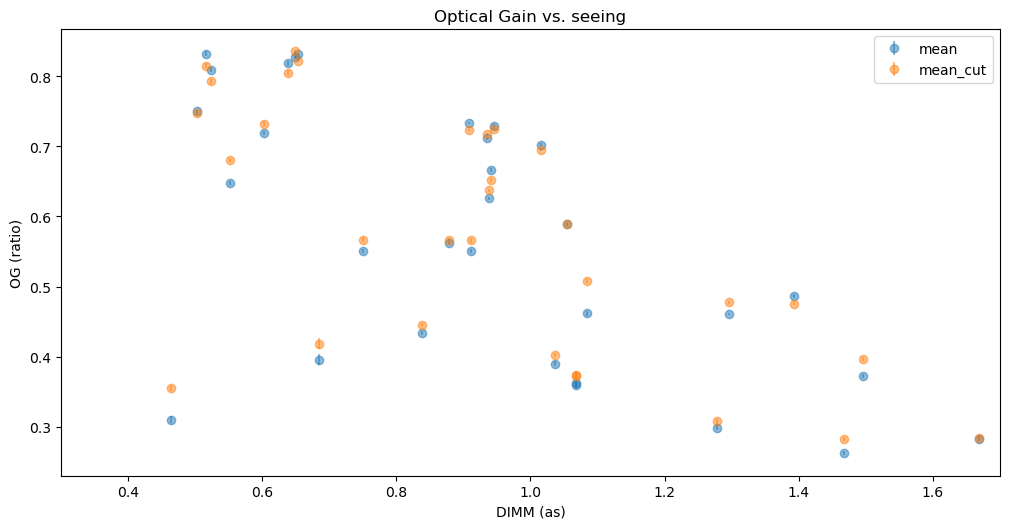

In [14]:
fig = plt.figure(figsize=(10, 5))
plt.errorbar(df_telem_OG['dimm_mod'], df_telem_OG['OG_mean'], yerr = df_telem_OG['OG_std'], alpha=0.5, fmt='o', label='mean')
plt.errorbar(df_telem_OG['dimm_mod'], df_telem_OG['OG'], yerr = df_telem_OG['OG_std'], alpha=0.5, fmt='o', label='mean_cut')
plt.tight_layout()
plt.xlim(0.3, 1.7)
plt.xlabel('DIMM (as)')
plt.ylabel('OG (ratio)')
plt.title('Optical Gain vs. seeing')
plt.legend()
plt.show()

### plotting with modes controlled

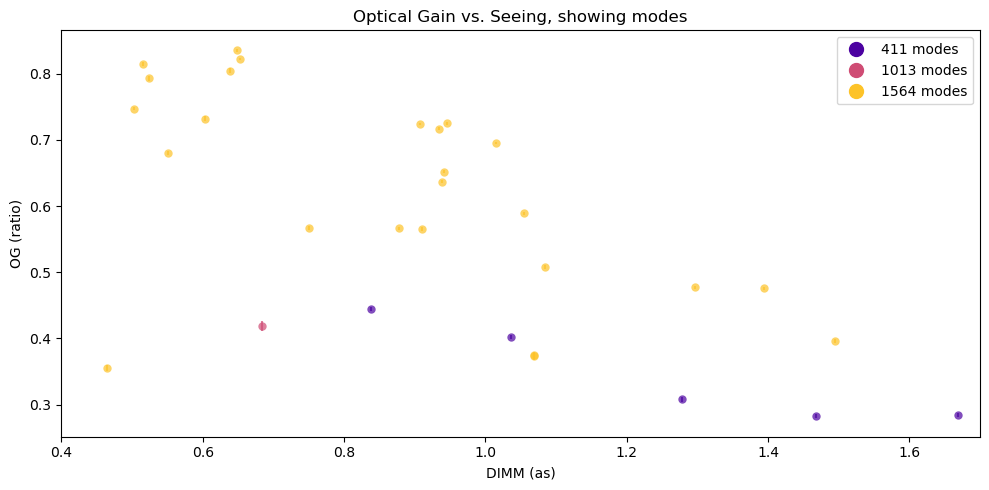

In [17]:
# PLOT: crappy way of showing modes

# Data set up
X = df_telem_OG['dimm_mod']
Y = df_telem_OG['OG']
Y_err = df_telem_OG['OG_std']
Z = df_telem_OG['n_modes']

# Plot set up
fig = plt.figure(figsize=(10, 5))
plt.title('Optical Gain vs. Seeing, showing modes')
plt.xlabel('DIMM (as)')
plt.ylabel('OG (ratio)')

# colormap nonsense
norm = matplotlib.colors.Normalize(vmin=min(Z)-200, vmax=max(Z)+200, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='plasma')
Z_color = np.array([(mapper.to_rgba(v)) for v in Z])

#PLOT DATA
for x_i, y_i, e_i, z_i, color in zip(X, Y, Y_err, Z, Z_color):
    plt.errorbar(x_i, y_i, yerr = e_i, marker=None, fmt='o', mew=0, color=color, alpha=0.7)
#plt.scatter(X, Y, c=Z, alpha=1, zorder=10, cmap='plasma')

#Generating labels manually like a LOSER
handles, labels = plt.gca().get_legend_handles_labels()
for v in Z.sort_values().unique():
    c_i = (mapper.to_rgba(v))
    point = Line2D([0], [0], label=f'{v} modes', marker='o', markersize=10,  color=c_i, linestyle='')
    handles.extend([point])
plt.legend(handles=handles)

#other plotting things
plt.xlim(0.4, 1.7)
plt.tight_layout()
plt.show()

### Using the error budget code

In [18]:
# import the code
reload(eb)

<module 'sim.err_budget' from '/home/eden/code/sparkles/sim/err_budget.py'>

In [19]:
DIMM_list = np.arange(.4, 1.8, 0.05)
r_o_list = eb.seeing_to_r_o(DIMM_list)
modes_list = [1564, 1013, 411]
jitter_list = [0, 4, 8]
strehl_list = [[[eb.calc_strehl(r_o = r_i, rms_jitter = a, n_act=nm) for r_i in r_o_list] for a in jitter_list] for nm in modes_list]

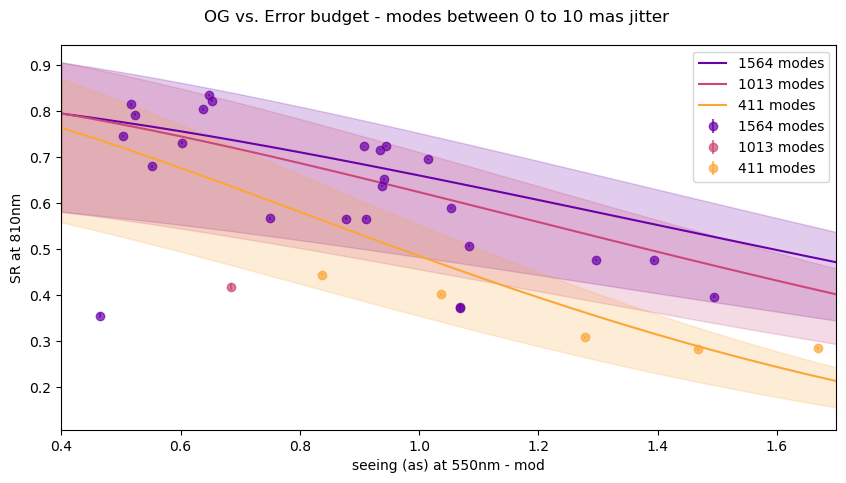

In [20]:
# PLOT: error budget included
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='white', sharey=True)
fig.suptitle("OG vs. Error budget - modes between 0 to 10 mas jitter", y = 0.95)
#fig.subplots_adjust(wspace=0, hspace = 0)

#colors = ['blue', 'teal', 'orange']
colors = pl.cm.plasma(np.linspace(0.2,.8, 3))

# Plotting the error budget
for i in range(len(modes_list)):
    axs.fill_between(DIMM_list, strehl_list[i][0], strehl_list[i][2], color=colors[i], alpha = 0.2)
    axs.plot(DIMM_list, strehl_list[i][1], c=colors[i], label = f"{modes_list[i]} modes")
    axs.set_xlabel('seeing (as) at 550nm - mod')

#plot the selfRMs
for i in range(len(modes_list)):
    # only get the selfRM with those number of modes
    df_temp = df_telem_OG.loc[df_telem_OG['n_modes'] == modes_list[i]]
    X = df_temp['dimm_mod']
    Y = df_temp['OG']
    Z = df_temp['OG_std']

    # plot as a scatter
    plt.errorbar(X, Y, yerr = Z, alpha=0.7, marker=None, fmt='o', color=colors[i], label = f"{modes_list[i]} modes")

axs.set_ylabel('SR at 810nm')
axs.legend()
plt.xlim(0.4, 1.7)
plt.show()

## Guide star Mag

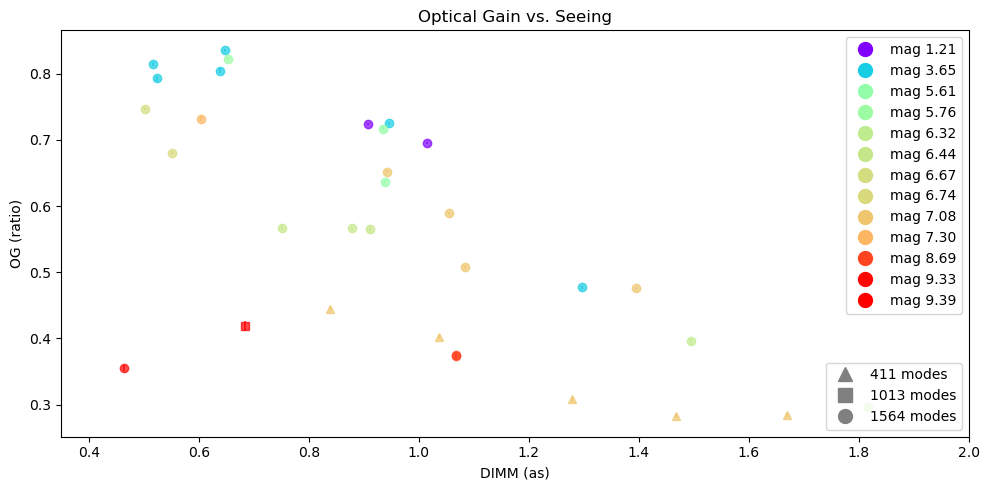

In [21]:
# PLOT: crappy way of showing mag

# Data set up
X = df_telem_OG['dimm_mod']
Y = df_telem_OG['OG']
Y_err = df_telem_OG['OG_std']
Z = df_telem_OG['I_c']
W = df_telem_OG['n_modes']
W_dict = {1564:'o', 1013:'s', 411:'^'}

# Plot set up
fig = plt.figure(figsize=(10, 5))
plt.title('Optical Gain vs. Seeing')
plt.xlabel('DIMM (as)')
plt.ylabel('OG (ratio)')

# colormap nonsense
norm = matplotlib.colors.Normalize(vmin=min(Z), vmax=max(Z), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
Z_color = np.array([(mapper.to_rgba(v)) for v in Z])

#PLOT DATA
for x_i, y_i, e_i, z_i, color, w_i in zip(X, Y, Y_err, Z, Z_color, W):
    plt.errorbar(x_i, y_i, yerr = e_i, marker=None, fmt=W_dict.get(w_i), color=color, alpha=0.7)
#plt.scatter(X, Y, c=Z, alpha=1, zorder=10, cmap='plasma')

#Generating labels manually like a LOSER
handles, labels = plt.gca().get_legend_handles_labels()
for v in Z.sort_values().unique():
    c_i = (mapper.to_rgba(v))
    point = Line2D([0], [0], label=f'mag {v:.2f}', marker='o', markersize=10,  color=c_i, linestyle='')
    handles.extend([point])
legend1 = plt.legend(handles=handles, loc=1)

# generating modes handles
mark_lines = []
for m in W.sort_values().unique():
    point = Line2D([0], [0], label=f'{m} modes', marker=W_dict.get(m), markersize=10,  color='grey', linestyle='')
    mark_lines.extend([point])
plt.legend(handles=mark_lines, loc=4)
plt.gca().add_artist(legend1)

#other plotting things
plt.xlim(0.35, 2.0)
plt.tight_layout()
plt.show()

In [22]:
DIMM_list = np.arange(.3, 2.1, 0.05)
r_o_list = eb.seeing_to_r_o(DIMM_list)
mags_list = np.arange(1, 10, 1)
strehl_mag_list = np.array([[eb.calc_strehl(r_o = r_i, s_mag = m, rms_jitter = 5, n_act = 1564, Hz=1800) for r_i in r_o_list] for m in mags_list])

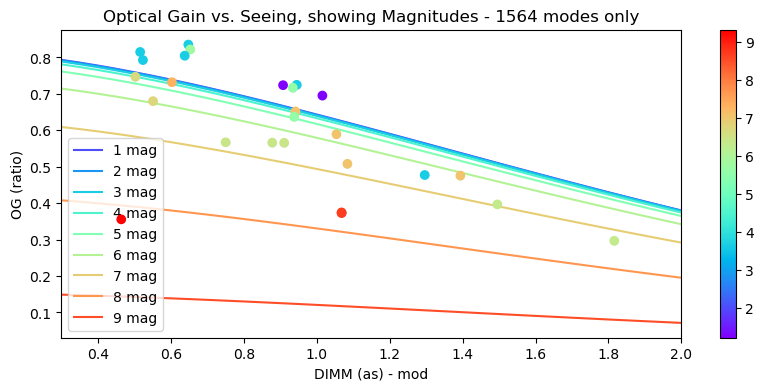

In [23]:
### Plot: Just magnitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,4), facecolor='white', sharey=True)
colors = pl.cm.rainbow(np.linspace(0.1,.9, len(mags_list)))

# Plotting the error budget
for i in range(len(mags_list)):
    #axs.fill_between(DIMM_list, strehl_mag_list[i][0], strehl_mag_list[i][2], color=colors[i], alpha = 0.2)
    axs.plot(DIMM_list, strehl_mag_list[i], c=colors[i], label = f"{mags_list[i]} mag")
    axs.set_xlabel('seeing (as) at 550nm - mod')
    axs.legend()

# selfRM points
df_temp = df_telem_OG.loc[df_telem_OG['n_modes'] == 1564]
X = df_temp['dimm_mod']
Y = df_temp['OG']
Z = df_temp['I_c']

plt.errorbar(X, Y, yerr = df_temp['OG_std'], alpha=0.2, marker=None, fmt='o', mew=0)
plt.scatter(X, Y, c=Z, alpha=1, zorder=10, cmap='rainbow')
plt.colorbar()

plt.xlim(0.3, 2.0)
plt.xlabel('DIMM (as) - mod')
plt.ylabel('OG (ratio)')
plt.title('Optical Gain vs. Seeing, showing Magnitudes - 1564 modes only')
plt.show()


### range of points per selfRM

In [24]:
df_telem_OG.sort_values(by=['OG'], inplace=True)

In [32]:
# iter over rows - get predicted strehl
jitter_list = [0]
wind_list = [10, 18.7, 30]

SR_est_list = []
dimm_list = []

for idx, row in df_telem_OG.iterrows():
    # pull the fits files from the right place
    if(row['type_x'] == 'SKY'):
        ro_i = eb.seeing_to_r_o(row['dimm_mod'])
        nm_i = row['n_modes']
        mag_i = row['I_c']
        Hz_i = row['fps_x']

        SR_est = np.array([[eb.calc_strehl(r_o=ro_i, s_mag=mag_i, n_act=nm_i, Hz=Hz_i, rms_jitter=j, v_wind=w) for w in wind_list] for j in jitter_list])
        SR_est_list.append(SR_est.flatten())
        dimm_list.append(row['dimm_mod'])

SR_est_list = np.array(SR_est_list)

# Creating the list of values 
label_list = np.array([[f"jitter {j}, wind {w}" for w in wind_list] for j in jitter_list] ).flatten()


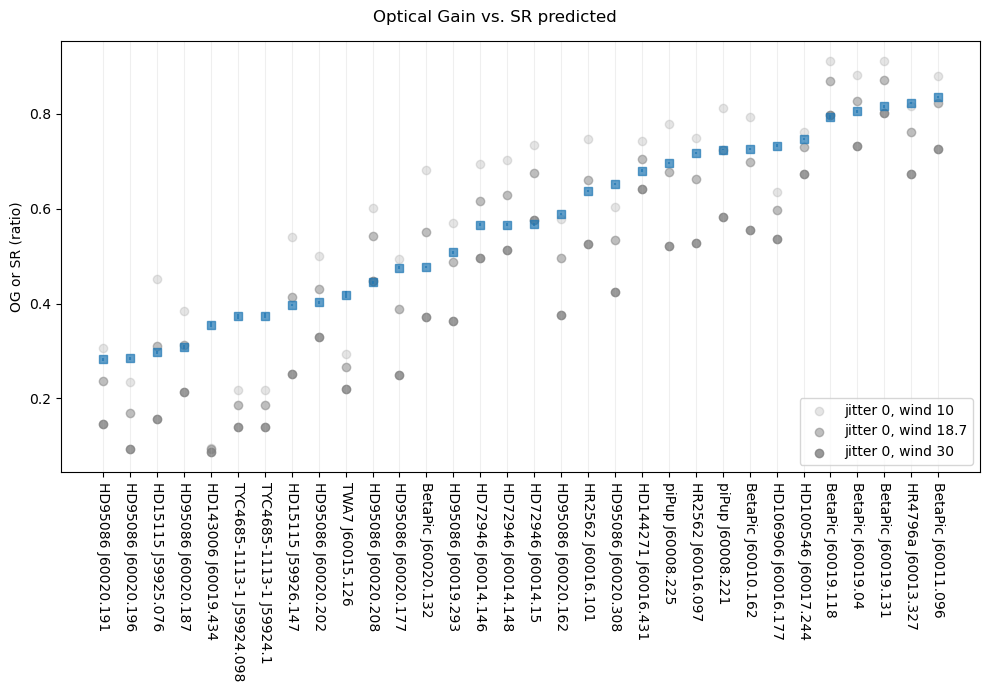

In [38]:
## PLOT: telemtry vs. prediction
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,7), facecolor='white', sharey=True)

for i in range(SR_est_list.shape[1]):
    plt.scatter(df_telem_OG['name'], SR_est_list[:, i], color = 'gray', alpha = 0.2 + 0.3*i, label = label_list[i])

plt.legend(loc=4)
plt.errorbar(df_telem_OG['name'], df_telem_OG['OG'], yerr=df_telem_OG['OG_std'], fmt='s', alpha = 0.7)

plt.xticks(rotation=-90)
plt.suptitle('Optical Gain vs. SR predicted')
plt.ylabel('OG or SR (ratio)')
plt.tight_layout()
plt.grid(axis='x', linestyle='-', alpha=0.2)
plt.show()

NameError: name 'SR_est_list' is not defined

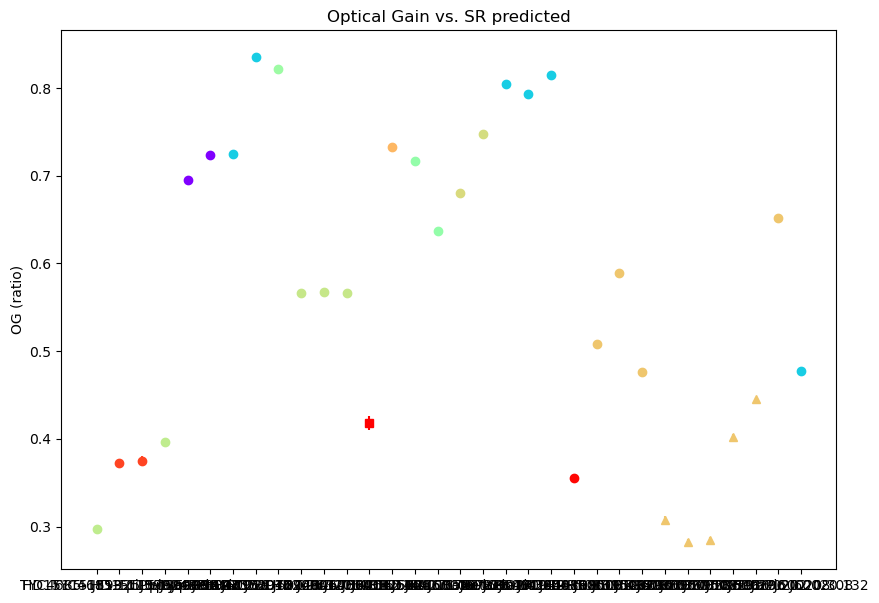

In [14]:
# Telemetry vs OG but PRETTY

# Data set up
X = df_telem_OG['name']
Y = df_telem_OG['OG']
Y_err = df_telem_OG['OG_std']
Z = df_telem_OG['I_c']
W = df_telem_OG['n_modes']
W_dict = {1564:'o', 1013:'s', 411:'^'}

# Plot set up
fig = plt.figure(figsize=(10, 7))
plt.title('Optical Gain vs. SR predicted')
plt.ylabel('OG (ratio)')

# colormap nonsense
norm = matplotlib.colors.Normalize(vmin=min(Z), vmax=max(Z), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
Z_color = np.array([(mapper.to_rgba(v)) for v in Z])

#PLOT DATA
for x_i, y_i, e_i, z_i, color, w_i in zip(X, Y, Y_err, Z, Z_color, W):
    ebd = plt.errorbar(x_i, y_i, yerr = e_i, marker=None, fmt=W_dict.get(w_i), color=color, alpha=1)

# PLOT Predictions
for i in range(SR_est_list.shape[1]):
    plt.scatter(df_telem_OG['name'], SR_est_list[:, i], color = 'gray', alpha = 0.2 + 0.3*i, label = label_list[i], marker='x')
legend1 = plt.legend(loc=2)

# generating modes handles
mark_lines = []
for m in W.sort_values().unique():
    point = Line2D([0], [0], label=f'{m} modes', marker=W_dict.get(m), markersize=10,  color='grey', linestyle='')
    mark_lines.extend([point])
plt.legend(handles=mark_lines, loc=4)
plt.gca().add_artist(legend1)

#other plotting things
plt.colorbar(mapper, fraction=0.046, pad=0.04)
plt.xticks(rotation=-90)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()


## Saving a df to share

In [28]:
# save a tidy version to a CSV
df_clean = df_telem_OG[['UT_x', 'jul', 'name', 'target', 'I_c', 'dimm_fwhm', 'el','dimm_mod', 'fps_x', 'loopgain', 'gains', 'n_modes', 'selfRM', 'l_selfRM', 'OG', 'OG_std',]].copy(deep=True)
df_clean.rename(columns={"UT_x": "UT", "jul": "MJD", "fps_x":'fps', "l_selfRM":'selfRM_LAB', 'selfRM':'selfRM_SKY', 'I_c':'mag_I_c', 'OG_std': 'OG_StandErr'}, inplace=True)
df_clean.to_csv('OG_with_telem.csv')

Index(['column0_x', 'selfRM', 'type_x', 'UT_x', 'MOD_x', 'TRIG_x', 'HZ_x',
       'SEPS_x', 'ANGS_x', 'AMPS_x', 'ts_x', 'fps_x', 'emGain_x', 'exptime_x',
       'ts:1', 'atime', 'wtime', 'wmatime', 'ts:2', 'dimm_fwhm', 'ts:3', 'ra',
       'dc', 'el', 'ha', 'rotoff', 'ts:4', 'state', 'loopgain', 'multcoef',
       'ts:5', 'gains', 'mcs', 'camwfs_time_ts', 'camwfs_time_ts:1',
       'tcsi_telsee_ts', 'tcsi_telpos_ts', 'holoop_ts', 'hogain_ts',
       'column0_y', 'type_y', 'UT_y', 'MOD_y', 'TRIG_y', 'HZ_y', 'SEPS_y',
       'ANGS_y', 'AMPS_y', 'ts_y', 'fps_y', 'emGain_y', 'exptime_y',
       'l_selfRM', 'l_fps', 'l_SEPS', 'l_ANGS', 'l_AMPS', 'l_MOD', 'Target',
       'target', 'spec_type', 'Gia_G', 'G-V', 'V-Ic', 'I_c', 'I_c_wave',
       'mag_V', 'wav_V', 'mag_I', 'wav_I', 'jul', 'name', 'OG', 'OG_mean',
       'OG_std', 'OG_std_mean', 'dimm_mod', 'n_modes'],
      dtype='object')